# A/B Testing for Payment Method

A/B testing (also known as split testing) is the process of comparing two versions of a web page, email, or other marketing asset and measuring the difference in performance. In A/B testing, statistical analysis is used to determine which variation is performing better for a given conversion goal.

In this case, a retail company has an idea to use e-payment in the payment system at the cashier. However, other employees thought that using cash was already effective. Therefore, I want to test the use of e-payment at one of the company branches by means of A/B testing. I will test 2 branches: branch A and branch B. Branch A will use cash for the payment, while for Branch B will use e-payment.

In A/B testing the parameters used are:
- Average payment time
- Convertion rate (proportion of customers who make transactions)

The data used in this test is transaction data from the two branches which will be tested by A/B testing.

### Importing needed packages and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('datapembelian.csv')
display(df)

,day,merchant,cust,payment,avg_paytime,conv_rate
0,1,A,2002,cash,15,0.4
1,1,B,1809,epayment,7,0.3
2,2,A,2111,cash,12,0.3
3,2,B,2287,epayment,8,0.7
4,3,A,1923,cash,9,0.5
5,3,B,2321,epayment,6,0.6
6,4,A,1298,cash,11,0.4
7,4,B,901,epayment,5,0.4
8,5,A,650,cash,8,0.8
9,5,B,1902,epayment,6,0.7


In [3]:
df.shape

(14, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          14 non-null     int64  
 1   merchant     14 non-null     object 
 2   cust         14 non-null     int64  
 3   payment      14 non-null     object 
 4   avg_paytime  14 non-null     int64  
 5   conv_rate    14 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 800.0+ bytes


<code>merchant</code> and <code>payment</code> are categorical.

In [5]:
df.describe()

,day,cust,avg_paytime,conv_rate
count,14.000000,14.000000,14.000000,14.000000
mean,4.000000,1589.500000,8.714286,0.507143
std,2.075498,583.178657,2.867016,0.163915
min,1.000000,650.000000,5.000000,0.300000
25%,2.250000,989.250000,6.250000,0.400000
50%,4.000000,1855.500000,8.000000,0.450000
75%,5.750000,2014.750000,10.500000,0.675000
max,7.000000,2321.000000,15.000000,0.800000


### Checking missing values

In [6]:
mv = df.isnull().sum().sort_values(ascending = False)
print(mv)

conv_rate      0
avg_paytime    0
payment        0
cust           0
merchant       0
day            0
dtype: int64


There's no missing values!

### Checking outliers of features

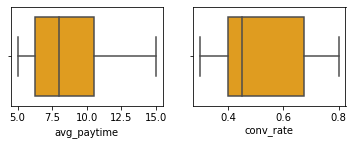

In [7]:
_=plt.figure()
_.add_subplot(2,2,1)
sns.boxplot(df['avg_paytime'], color='orange',orient="h")
_.add_subplot(2,2,2)
sns.boxplot(df['conv_rate'], color='orange',orient="h")

### Simple EDA
**1). I want to know the average payment time of using cash and e-payment.**

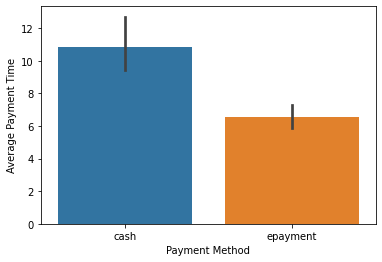

In [8]:
fig, ax = plt.subplots()
sns.barplot(x='payment', y='avg_paytime', data=df, ax=ax)
plt.xlabel('Payment Method')
plt.ylabel('Average Payment Time')
plt.show()

From the plot above, it can be seen that payment by e-payment method takes less time than cash.

**2). Next, I want to know the number of customer at branch A and B.**

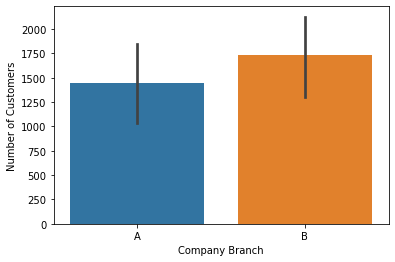

In [9]:
fig, ax = plt.subplots()
sns.barplot(x='merchant', y='cust', data=df, ax=ax)
plt.xlabel('Company Branch')
plt.ylabel('Number of Customers')
plt.show()

Customer at branch B is more than branch A.

**3). Conversion rate per day**

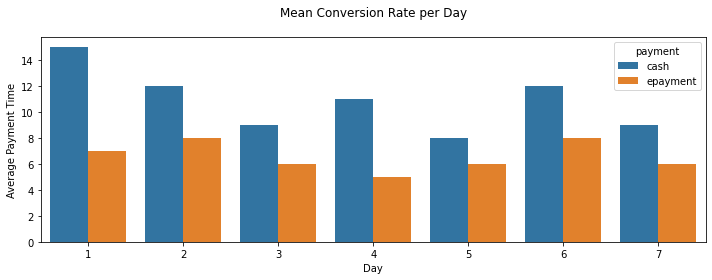

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x='day', y='avg_paytime', hue='payment', data=df, ax=ax)
ax.set_title('Mean Conversion Rate per Day\n')
plt.xlabel('Day')
plt.ylabel('Average Payment Time')
plt.tight_layout()
plt.show()

### Changing the <code>payment</code> into numeric

In [11]:
df['payment'] = LabelEncoder().fit_transform(df['payment'])

### The hypothesis
H0 : average payment time using cash and e-payment are the same<br>
H1 : average payment time using e-payment is faster than cash

### A. T-test for average payment time
- alpha/confidence level = 0.05

In [12]:
test_val = df[df['payment'] == 1]['avg_paytime'].values
cont_val = df[df['payment'] == 0]['avg_paytime'].values

In [13]:
print('Test val mean = ',test_val.mean())
print('Cont val mean = ',cont_val.mean())

Test val mean =  6.571428571428571
Cont val mean =  10.857142857142858


In [14]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-4.256853928563619, pvalue=0.002394900697258744)


### Result
Because the p-value is less than 0.05 (alpha/confidence level) then *reject* H0 and it can be concluded that the average payment using payment is **faster** than cash.

### B. T-test for convertion rate
- alpha/confidence level = 0.05

### The hypothesis
H0 : average convertion rate of the both method are the same<br>
H1 : e-payment method has bigger convertion rate than cash

In [15]:
test_val2 = df[df['payment'] == 1]['conv_rate'].values
cont_val2 = df[df['payment'] == 0]['conv_rate'].values

In [16]:
print('Test val mean = ',test_val2.mean())
print('Cont val mean = ',cont_val2.mean())

Test val mean =  0.5428571428571429
Cont val mean =  0.4714285714285715


In [17]:
print(ttest_ind(test_val2, cont_val2, equal_var=False))

Ttest_indResult(statistic=0.8040844011283464, pvalue=0.43706108007333755)


### Result:
Because the p-value is more than 0.05 (alpha/confidence level) then *retain* H0 and it can be concluded that the average convertion rate of the both method are the **same**.

### Conclusion
After A/B testing we can conclude that :<br>
- Average payment using e-payment is faster than cash<br>
- E-payment dan cash have same average convertion rate<br>

I could prove to other employee that e-payment is more effective. A/B testing allows me to carefully changes to the user while gathering data and about the results. This also allows me to build hypotheses, and to learn better why certain elements have an impact on user behavior.

### References :
- [Putri Bunga R on GitHub](https://github.com/putribungar)
- https://www.crazyegg.com/blog/ab-testing/